# FC Barcelona Defensive Midfielders Prospects (22-23 Analysis)

In [3]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statistics import mean
from math import pi
import os
from pathlib import Path

In [33]:
# import general dataset
df = pd.read_csv('Final FBRef 2022-2023.csv')

# define genereal variables
minutes_played = 475 # This is gonna filter out those players that played in both teams (like Oriol Romeu in this case)

# Data Cleansing

In [221]:
# creating selected players dataset

player_pos = "Defensive Midfield"
player_prompt = ["Sergio Busquets", "Martín Zubimendi", "Sofyan Amrabat", "Oriol Romeu"] #, "Hugo Guillamón", "Leandro Paredes", "Joshua Kimmich"] "ARTHUR VERMEEREN"]

df['RecovPer90'] = df['Recov'] / (df['Min']/90)
#f, axes = plt.subplots(3,4, figsize=(30,10))

df_filt = df[df['Player'].isin(player_prompt)]
df_filt = df_filt[df_filt['Min']>= minutes_played].reset_index(drop=True)

# creating overall dataeset (for all central defensive midfielders in the top 5 leagues)
df_overall = df[df['Main Position'] == player_pos]
df_overall = df_overall[df_overall['Min'] >= minutes_played ].reset_index(drop=True)


In [222]:
''' 
Variables to look for

~ PASSING AND PROGRESSIVE CARRIES 
'Passes CompletedPer90', 'TotCmp%Per90' (Pass accuracy), 'ProgPassDistPer90' (Progressive Passes Distance), 
'xAPer90', 'KeyPassesPer90'

~GOAL/SHOT CREATING ACTIONS
'SCA90' (shot creating actions per 90), 

~DEFENSIVE ATTRIBUTES
'TklPer90' (Tackles), 'TklWinPossPer90' , 'BlocksPer90', 'IntPer90', 'AerialWin%Per90', 

~SOME OTHER INTERESTING METRICS
'CarryMistakesPer90' (miscontrol), 'DisposesedPer90', 'ReceivedPassPer90', 

'''
# add a recoveries per 90 metric
df_filt['RecovPer90'] = df_filt['Recov']/(df_filt['Min']/90)

#list the variables we will use for the analysis
kept_variables = ['Player', 'Squad', 'PassesCompletedPer90', 'TotCmp%Per90', 
                  'ProgPassDistPer90', 'xAPer90',  'KeyPassesPer90', 'SCA90',
                 'TklPer90', 'TklWinPossPer90', 'BlocksPer90', 'IntPer90', 'AerialWin%Per90',
                 'CarryMistakesPer90', 'DisposesedPer90', 'ReceivedPassPer90','RecovPer90']

# filter based on necessary variables
df_filt = df_filt.loc[:, kept_variables]
df_overall = df_overall.loc[:, kept_variables]

## One Player: Sergio Busquets

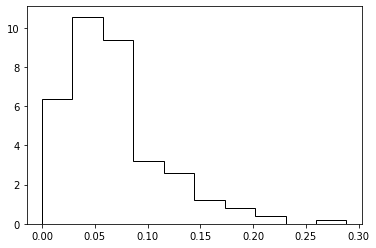

In [70]:
plt.hist(df_overall['xAPer90'], bins=10, density=True, histtype='step', color='black')
plt.show()

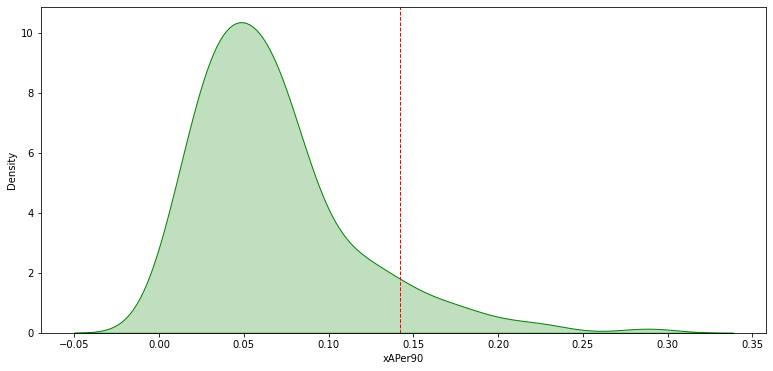

In [98]:
# colors = {busquets:'red', 

plt.figure(figsize=(13, 6))  # adjustin the size of the figure (take multiple ax, fig into account)
sns.kdeplot(df_overall['xAPer90'], color='green', fill='True') # draw the spread distribution
plt.axvline(df_filt['xAPer90'][2].sum(), color='red', linestyle='dashed', linewidth=1) # add the player's line


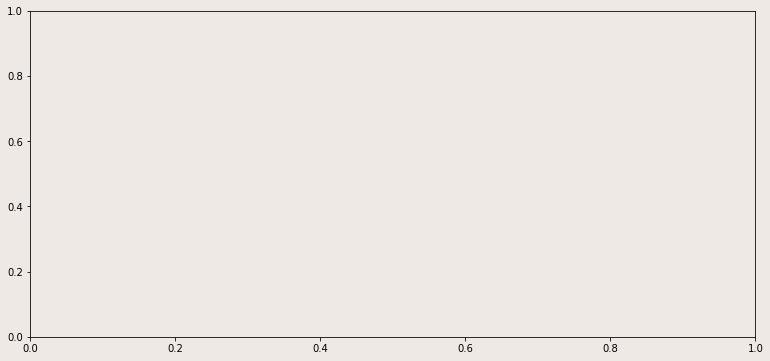

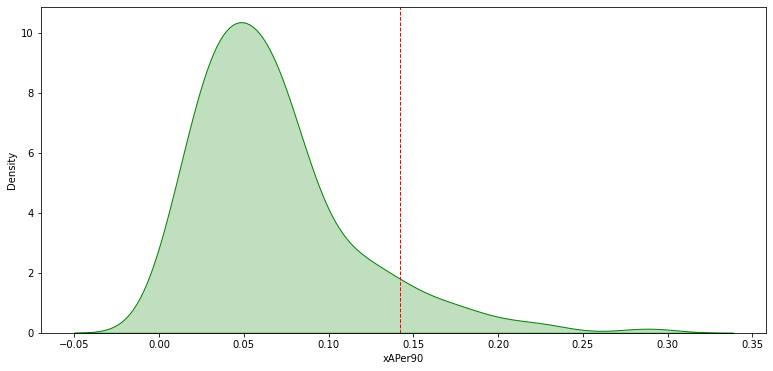

In [97]:
fig, ax = plt.subplots(figsize=(13, 6))

fig.set_facecolor("#EFE9E6")
ax.set_facecolor('#EFE9E6')

plt.figure(figsize=(13, 6))  # adjustin the size of the figure (take multiple ax, fig into account)
sns.kdeplot(df_overall['xAPer90'], color='green', fill='True') # draw the spread distribution
plt.axvline(df_filt['xAPer90'][2].sum(), color='red', linestyle='dashed', linewidth=1) # add the player's line


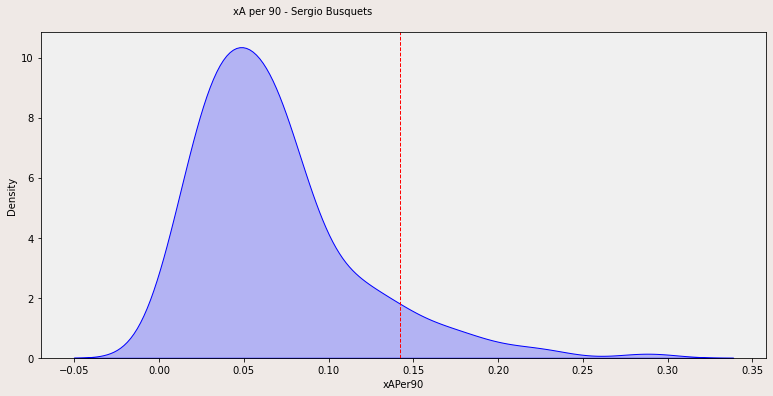

In [108]:
# plt.figure(figsize=(16, 10))

fig, ax = plt.subplots(figsize=(13,6))

ax.set_facecolor('#f0f0f0')  # change background color of axes
fig.set_facecolor('#EFE9E6') # change figure background color

# set the title
title = f'xA per 90 - Sergio Busquets'
plt.figtext(0.33, 0.92, title)

sns.kdeplot(df_overall['xAPer90'], color='blue', fill=True)
ax.axvline(df_filt['xAPer90'][2].sum(), color='red', linestyle='dashed', linewidth=1)

plt.show()

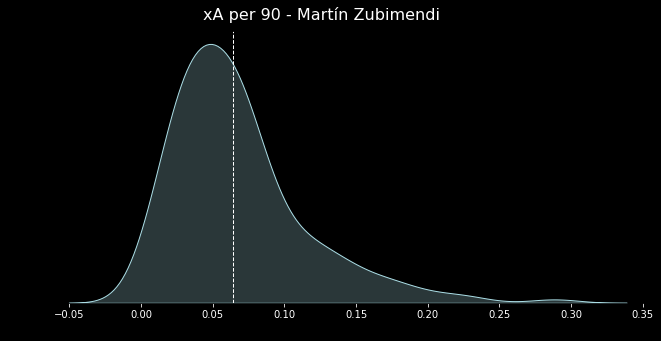

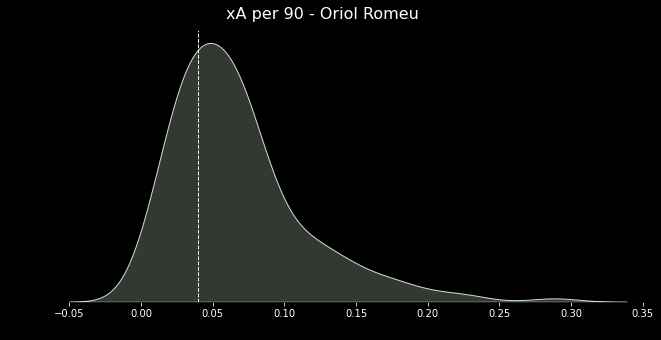

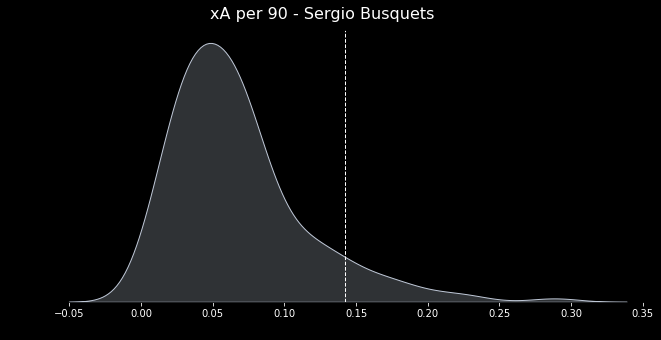

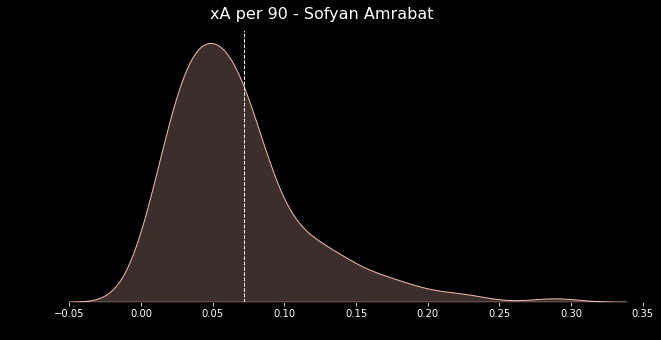

In [156]:
# define colors ~ NEED TO CHANGE LATER
colors = ['#abdee6', '#cce2cb', '#bfc8d7', '#f1bcae']

counter = 0

while counter < len(df_filt['xAPer90']):
    fig, ax = plt.subplots(figsize=(11,5))

    ax.set_facecolor('black')  # change background color of axes
    fig.set_facecolor('black') # change figure background color

    # set the title
    title = f'xA per 90 - {df_filt["Player"][counter]}'
    plt.figtext(0.48, 0.91, title, ha='center', fontsize=16, color='white')

    sns.kdeplot(df_overall['xAPer90'], color=colors[counter], fill=True)
    ax.axvline(df_filt['xAPer90'][counter].sum(), color='white', linestyle='dashed', linewidth=1)
     
    # change axis color to white so we can see it
    ax.tick_params(axis='x', colors='white')
    #ax.tick_params(axis='y', colors='white')    
        
    counter += 1    
    
plt.show()

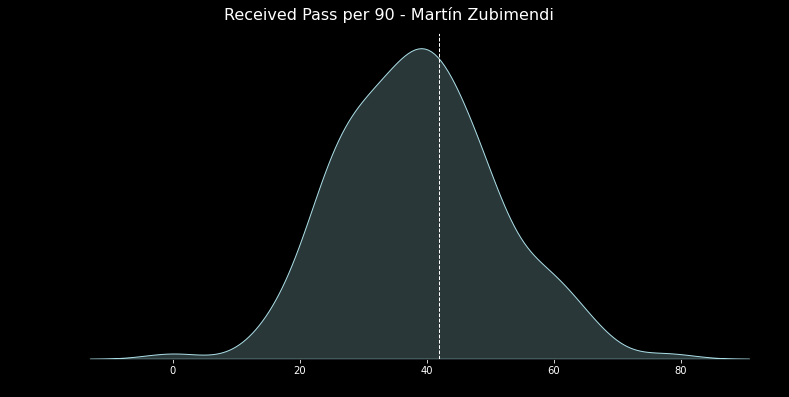

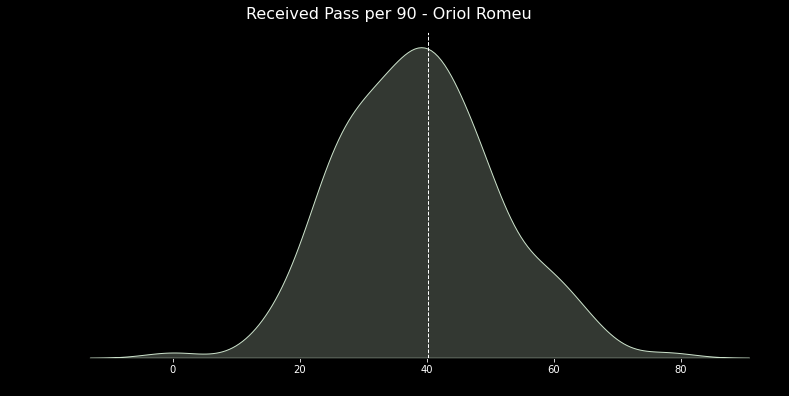

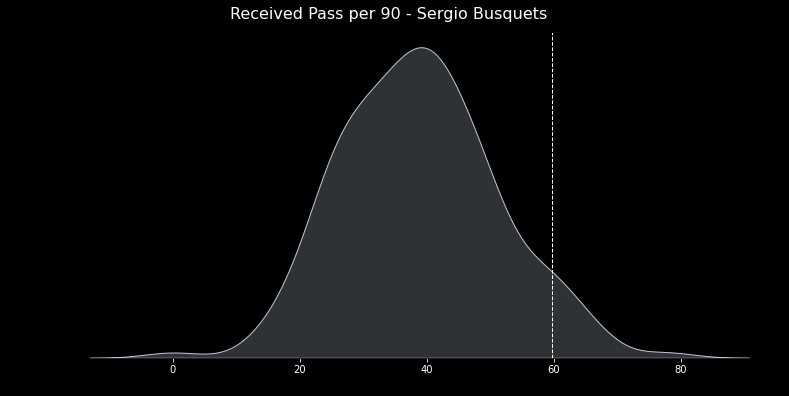

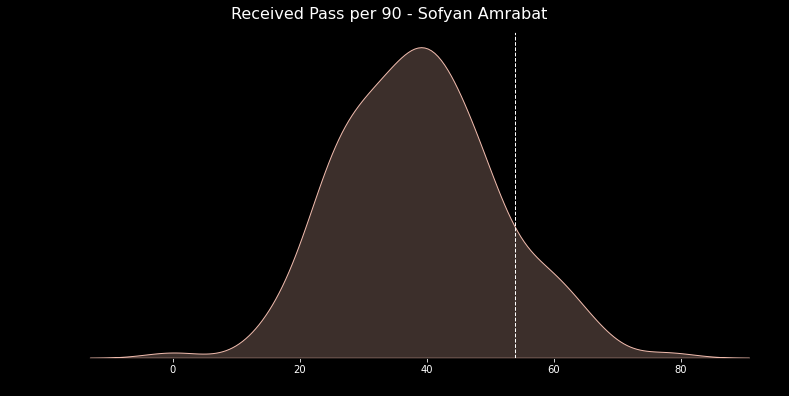

In [155]:
# define colors ~ NEED TO CHANGE LATER
colors = ['#abdee6', '#cce2cb', '#bfc8d7', '#f1bcae']

counter = 0

while counter < len(df_filt['ReceivedPassPer90']):
    fig, ax = plt.subplots(figsize=(13,6))

    ax.set_facecolor('black')  # change background color of axes
    fig.set_facecolor('black') # change figure background color

    # set the title
    title = f'Received Pass per 90 - {df_filt["Player"][counter]}'
    plt.figtext(0.48, 0.91, title, ha='center', fontsize=16, color='white')

    sns.kdeplot(df_overall['ReceivedPassPer90'], color=colors[counter], fill=True)
    ax.axvline(df_filt['ReceivedPassPer90'][counter].sum(), color='white', linestyle='dashed', linewidth=1)
     
    # change axis color to white so we can see it
    ax.tick_params(axis='x', colors='white')
    #ax.tick_params(axis='y', colors='white')    
        
    counter += 1    
    
plt.show()

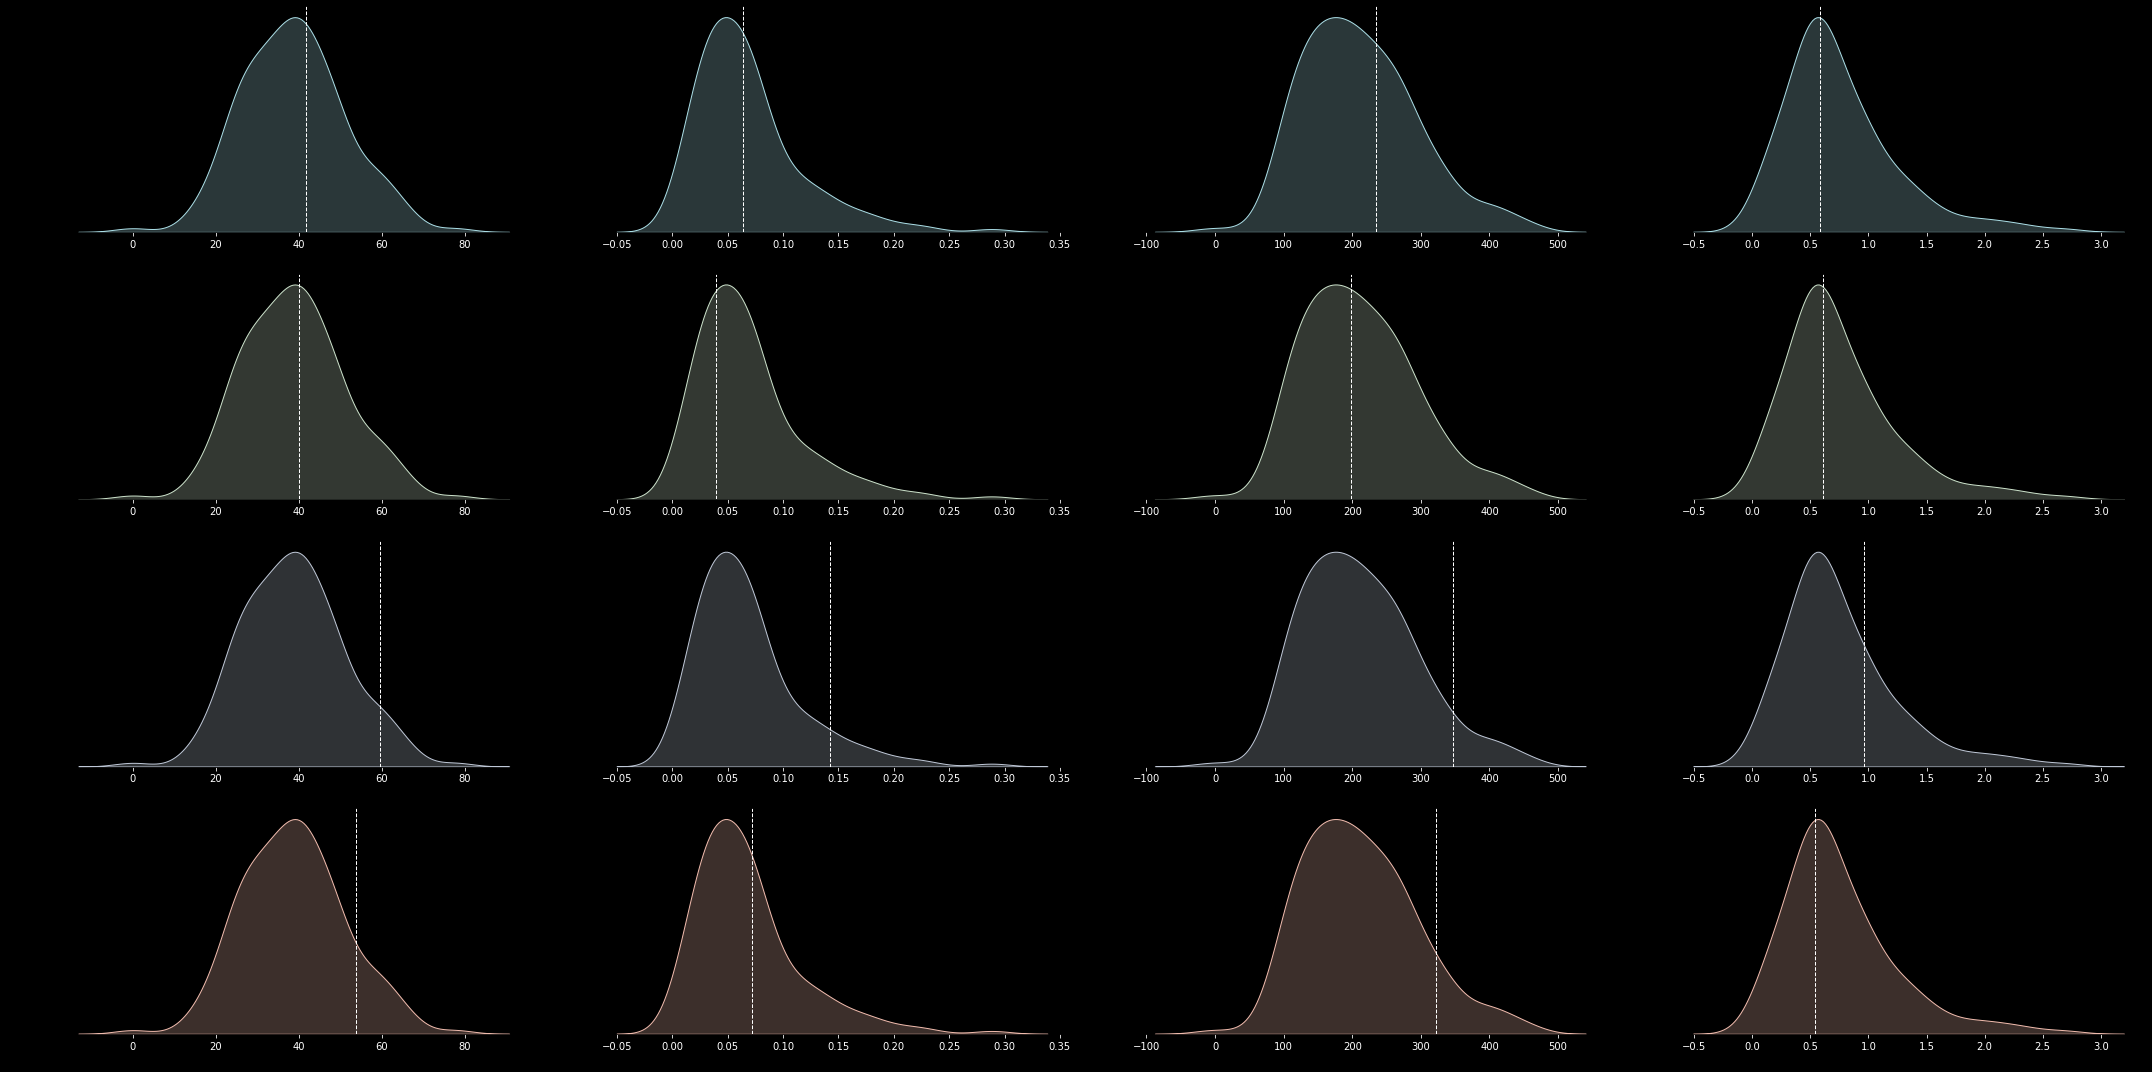

In [189]:
''' POSSESSION GRAPH '''

f, axes = plt.subplots(nrows=4, ncols=4, figsize=(30, 15))


''' ReceivedPassPer90'''
counter = 0

while counter < len(df_filt['ReceivedPassPer90']):
    ax = axes[counter % 4, counter // 4]  # Calculate row and column indices
    
    ax.set_facecolor('black')  # change background color of axes
    f.set_facecolor('black')   # change figure background color

    # set the title ~ WE'LL EDIT THE TITLES IN THE PDF ITSELF
    title = ' ' #f'Received Pass per 90 - {df_filt["Player"][counter]}'
    plt.figtext(0.48, 0.91, title, ha='center', fontsize=16, color='white')
    
    

    sns.kdeplot(df_overall['ReceivedPassPer90'], color=colors[counter], fill=True, ax=ax)
    ax.axvline(df_filt['ReceivedPassPer90'][counter].sum(), color='white', linestyle='dashed', linewidth=1)

    # change axis color to white so we can see it
    ax.tick_params(axis='x', colors='white')
    #ax.tick_params(axis='y', colors='white')

    counter += 1

''' xA PER 90'''
counter = 0    
while counter < len(df_filt['xAPer90']):
    ax = axes[counter % 4, 1]  # Calculate row and column indices
    
    ax.set_facecolor('black')  # change background color of axes
    f.set_facecolor('black')   # change figure background color

    # set the title ~ WE'LL EDIT THE TITLES IN THE PDF ITSELF
    title = ' ' #f'Received Pass per 90 - {df_filt["Player"][counter]}'
    plt.figtext(0.48, 0.91, title, ha='center', fontsize=16, color='white')
    
    

    sns.kdeplot(df_overall['xAPer90'], color=colors[counter], fill=True, ax=ax)
    ax.axvline(df_filt['xAPer90'][counter].sum(), color='white', linestyle='dashed', linewidth=1)

    # change axis color to white so we can see it
    ax.tick_params(axis='x', colors='white')
    #ax.tick_params(axis='y', colors='white')

    counter += 1

    
''' ProgPassDistPer90'''
counter = 0    
while counter < len(df_filt['ProgPassDistPer90']):
    ax = axes[counter % 4, 2]  # Calculate row and column indices
    
    ax.set_facecolor('black')  # change background color of axes
    f.set_facecolor('black')   # change figure background color

    # set the title ~ WE'LL EDIT THE TITLES IN THE PDF ITSELF
    title = ' ' #f'Received Pass per 90 - {df_filt["Player"][counter]}'
    plt.figtext(0.48, 0.91, title, ha='center', fontsize=16, color='white')
    
    

    sns.kdeplot(df_overall['ProgPassDistPer90'], color=colors[counter], fill=True, ax=ax)
    ax.axvline(df_filt['ProgPassDistPer90'][counter].sum(), color='white', linestyle='dashed', linewidth=1)

    # change axis color to white so we can see it
    ax.tick_params(axis='x', colors='white')
    #ax.tick_params(axis='y', colors='white')

    counter += 1
    
''' KeyPassesPer90'''
counter = 0    
while counter < len(df_filt['KeyPassesPer90']):
    ax = axes[counter % 4, 3]  # Calculate row and column indices
    
    ax.set_facecolor('black')  # change background color of axes
    f.set_facecolor('black')   # change figure background color

    # set the title ~ WE'LL EDIT THE TITLES IN THE PDF ITSELF
    title = ' ' #f'Received Pass per 90 - {df_filt["Player"][counter]}'
    plt.figtext(0.48, 0.91, title, ha='center', fontsize=16, color='white')
    
    

    sns.kdeplot(df_overall['KeyPassesPer90'], color=colors[counter], fill=True, ax=ax)
    ax.axvline(df_filt['KeyPassesPer90'][counter].sum(), color='white', linestyle='dashed', linewidth=1)

    # change axis color to white so we can see it
    ax.tick_params(axis='x', colors='white')
    #ax.tick_params(axis='y', colors='white')

    counter += 1
    
plt.tight_layout()
plt.show()


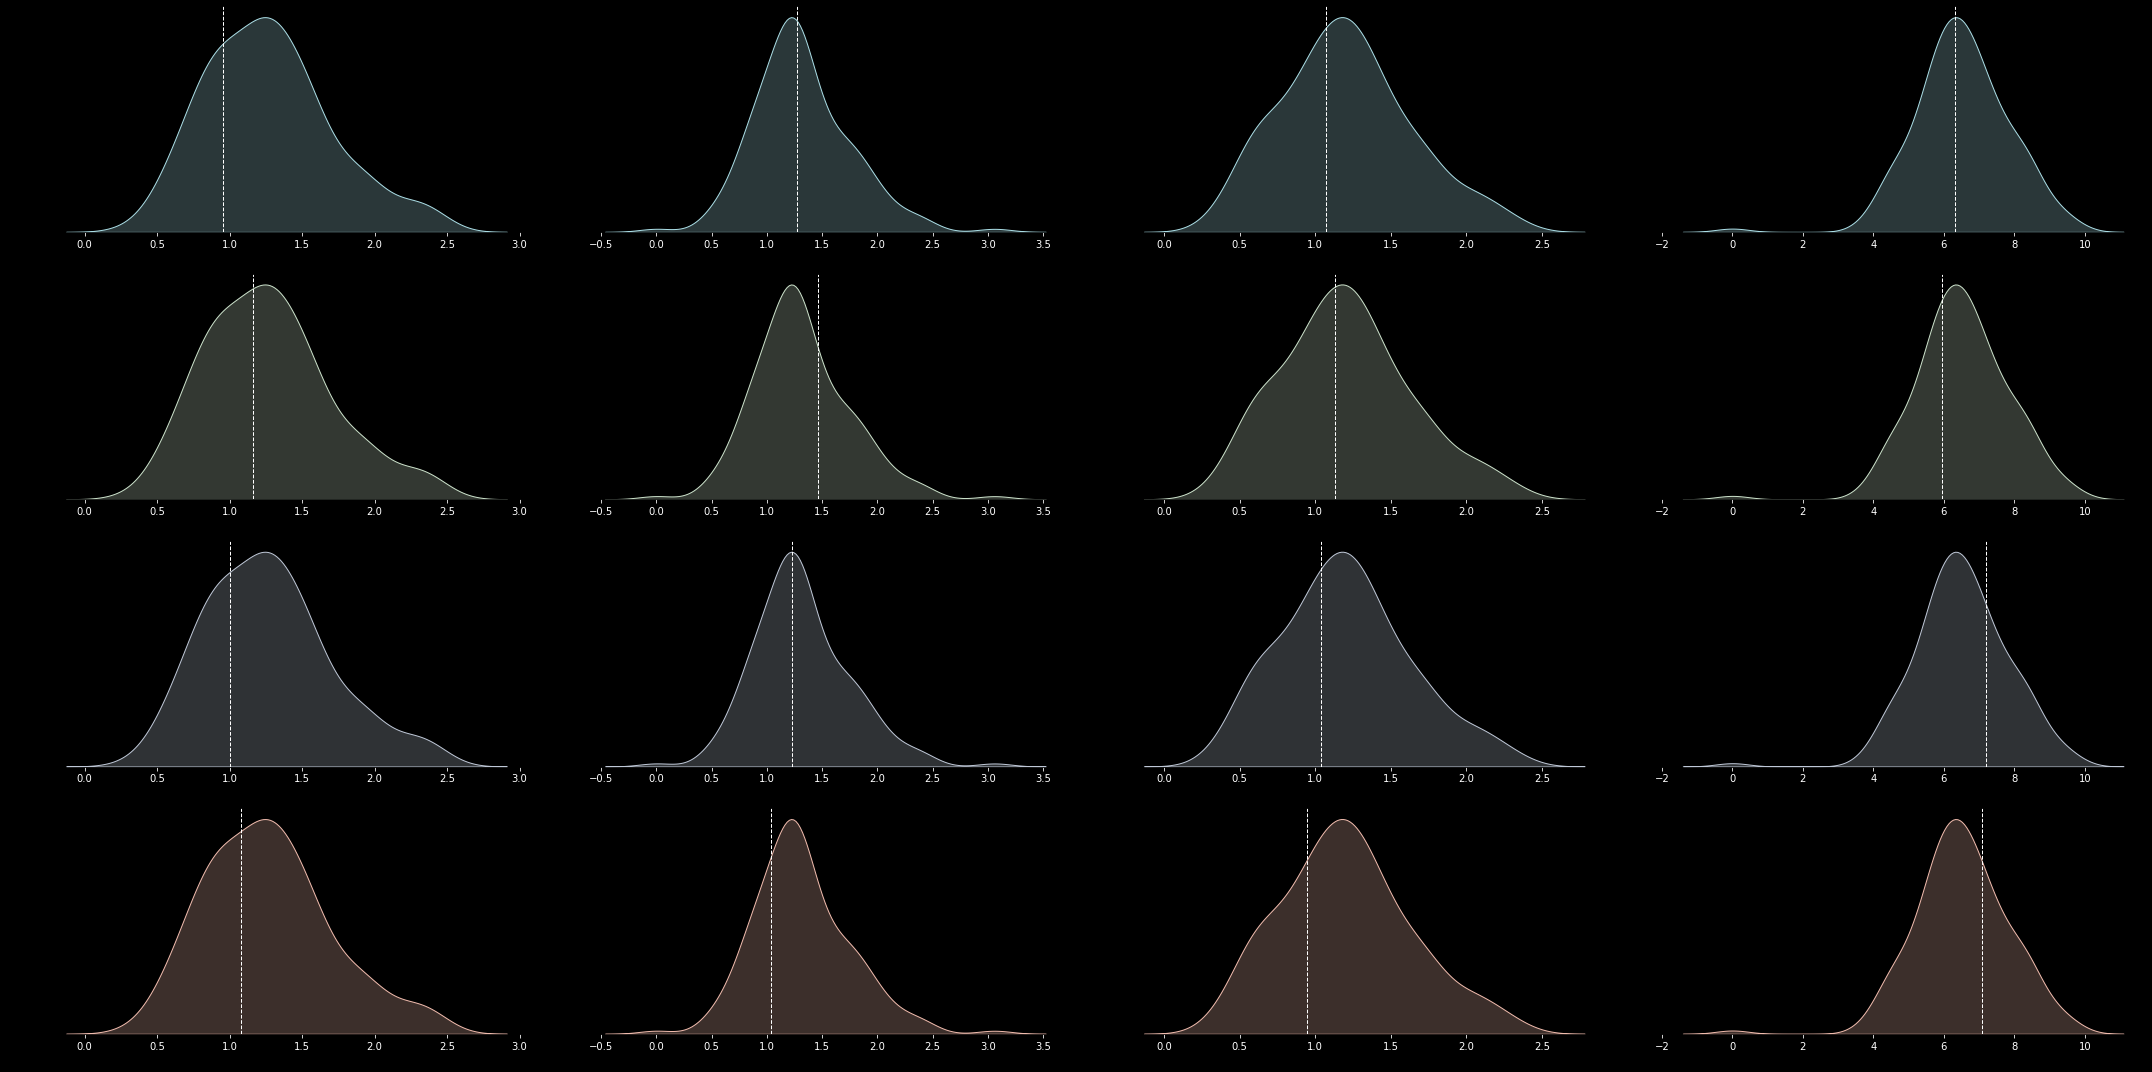

In [223]:
''' DEFENSIVE GRAPH '''

f, axes = plt.subplots(nrows=4, ncols=4, figsize=(30, 15))


'''TklWinPossPer90'''
counter = 0

while counter < len(df_filt['TklWinPossPer90']):
    ax = axes[counter % 4, counter // 4]  # Calculate row and column indices
    
    ax.set_facecolor('black')  # change background color of axes
    f.set_facecolor('black')   # change figure background color

    # set the title ~ WE'LL EDIT THE TITLES IN THE PDF ITSELF
    title = ' ' #f'Received Pass per 90 - {df_filt["Player"][counter]}'
    plt.figtext(0.48, 0.91, title, ha='center', fontsize=16, color='white')
    
    

    sns.kdeplot(df_overall['TklWinPossPer90'], color=colors[counter], fill=True, ax=ax)
    ax.axvline(df_filt['TklWinPossPer90'][counter].sum(), color='white', linestyle='dashed', linewidth=1)

    # change axis color to white so we can see it
    ax.tick_params(axis='x', colors='white')
    #ax.tick_params(axis='y', colors='white')

    counter += 1

'''BlocksPer90'''
counter = 0    
while counter < len(df_filt['BlocksPer90']):
    ax = axes[counter % 4, 1]  # Calculate row and column indices
    
    ax.set_facecolor('black')  # change background color of axes
    f.set_facecolor('black')   # change figure background color

    # set the title ~ WE'LL EDIT THE TITLES IN THE PDF ITSELF
    title = ' ' #f'Received Pass per 90 - {df_filt["Player"][counter]}'
    plt.figtext(0.48, 0.91, title, ha='center', fontsize=16, color='white')
    
    

    sns.kdeplot(df_overall['BlocksPer90'], color=colors[counter], fill=True, ax=ax)
    ax.axvline(df_filt['BlocksPer90'][counter].sum(), color='white', linestyle='dashed', linewidth=1)

    # change axis color to white so we can see it
    ax.tick_params(axis='x', colors='white')
    #ax.tick_params(axis='y', colors='white')

    counter += 1

    
'''IntPer90'''
counter = 0    
while counter < len(df_filt['IntPer90']):
    ax = axes[counter % 4, 2]  # Calculate row and column indices
    
    ax.set_facecolor('black')  # change background color of axes
    f.set_facecolor('black')   # change figure background color

    # set the title ~ WE'LL EDIT THE TITLES IN THE PDF ITSELF
    title = ' ' #f'Received Pass per 90 - {df_filt["Player"][counter]}'
    plt.figtext(0.48, 0.91, title, ha='center', fontsize=16, color='white')
    
    

    sns.kdeplot(df_overall['IntPer90'], color=colors[counter], fill=True, ax=ax)
    ax.axvline(df_filt['IntPer90'][counter].sum(), color='white', linestyle='dashed', linewidth=1)

    # change axis color to white so we can see it
    ax.tick_params(axis='x', colors='white')
    #ax.tick_params(axis='y', colors='white')

    counter += 1
    
'''RecovPer90'''
counter = 0    
while counter < len(df_filt['RecovPer90']):
    ax = axes[counter % 4, 3]  # Calculate row and column indices
    
    ax.set_facecolor('black')  # change background color of axes
    f.set_facecolor('black')   # change figure background color

    # set the title ~ WE'LL EDIT THE TITLES IN THE PDF ITSELF
    title = ' ' #f'Received Pass per 90 - {df_filt["Player"][counter]}'
    plt.figtext(0.48, 0.91, title, ha='center', fontsize=16, color='white')
    
    

    sns.kdeplot(df_overall['RecovPer90'], color=colors[counter], fill=True, ax=ax)
    ax.axvline(df_filt['RecovPer90'][counter].sum(), color='white', linestyle='dashed', linewidth=1)

    # change axis color to white so we can see it
    ax.tick_params(axis='x', colors='white')
    #ax.tick_params(axis='y', colors='white')

    counter += 1
    
plt.tight_layout()
plt.show()

# Radar Graph

In [385]:
df_filt.columns

Index(['Player', 'Squad', 'PassesCompletedPer90', 'TotCmp%Per90',
       'ProgPassDistPer90', 'xAPer90', 'KeyPassesPer90', 'SCA90', 'TklPer90',
       'TklWinPossPer90', 'BlocksPer90', 'IntPer90', 'AerialWin%Per90',
       'CarryMistakesPer90', 'DisposesedPer90', 'ReceivedPassPer90',
       'RecovPer90'],
      dtype='object')

In [387]:
from mplsoccer import Radar, FontManager, grid

# https://mplsoccer.readthedocs.io/en/latest/gallery/radar/plot_radar.html

params = ['PassesCompletedPer90', 'TotCmp%Per90', 'ProgPassDistPer90', 'xAPer90',
              'KeyPassesPer90', 'SCA90', 'TklPer90', 'TklWinPossPer90', 'BlocksPer90', 'IntPer90']

# the lower and upper boundaries for the statistics ~ MAYBE CHANGE THIS TO ALLOW SPACING IN THE RADAR
#-10, -0.5
#+10, +0.5
#
'''
low = [df_filt['PassesCompletedPer90'].min(),
       df_filt['TotCmp%Per90'].min(),
       df_filt['ProgPassDistPer90'].min(),
       df_filt['xAPer90'].min(),
       df_filt['KeyPassesPer90'].min(),
       df_filt['SCA90'].min(),
       df_filt['TklPer90'].min(),
       df_filt['TklWinPossPer90'].min()]
'''
low = [df_overall['PassesCompletedPer90'].quantile(0.25),
       df_overall['TotCmp%Per90'].quantile(0.25),
       df_overall['ProgPassDistPer90'].quantile(0.25),
       df_overall['xAPer90'].quantile(0.25),
       df_overall['KeyPassesPer90'].quantile(0.25),
       df_overall['SCA90'].quantile(0.25),
       df_overall['TklPer90'].quantile(0.25),
       df_overall['TklWinPossPer90'].quantile(0.25),
       df_overall['BlocksPer90'].quantile(0.25),
       df_overall['IntPer90'].quantile(0.25)
      ]
'''
high = [df_filt['PassesCompletedPer90'].max(), 
        df_filt['TotCmp%Per90'].max(),
        df_filt['ProgPassDistPer90'].max(),
        df_filt['xAPer90'].max(),
        df_filt['KeyPassesPer90'].max(),
        df_filt['SCA90'].max(),
        df_filt['TklPer90'].max(),
        df_filt['TklWinPossPer90'].max()]
'''
high = [df_overall['PassesCompletedPer90'].quantile(0.75), 
        df_overall['TotCmp%Per90'].quantile(0.75),
        df_overall['ProgPassDistPer90'].quantile(0.75),
        df_overall['xAPer90'].quantile(0.75),
        df_overall['KeyPassesPer90'].quantile(0.75),
        df_overall['SCA90'].quantile(0.75),
        df_overall['TklPer90'].quantile(0.75),
        df_overall['TklWinPossPer90'].quantile(0.75),
        df_overall['BlocksPer90'].quantile(0.75),
        df_overall['IntPer90'].quantile(0.75)
       ]




radar = Radar(params, low, high,
              round_int=[False]*len(params),
              num_rings = 4, # number of concentric circles
              ring_width = 1, center_circle_radius=1)

In [388]:
# storing values on lists
zubimendi_values = df_filt.loc[0, params].to_list()
romeu_values = df_filt.loc[1, params].to_list()
busquets_values = df_filt.loc[2, params].to_list()
amrabat_values = df_filt.loc[3, params].to_list()


In [298]:
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

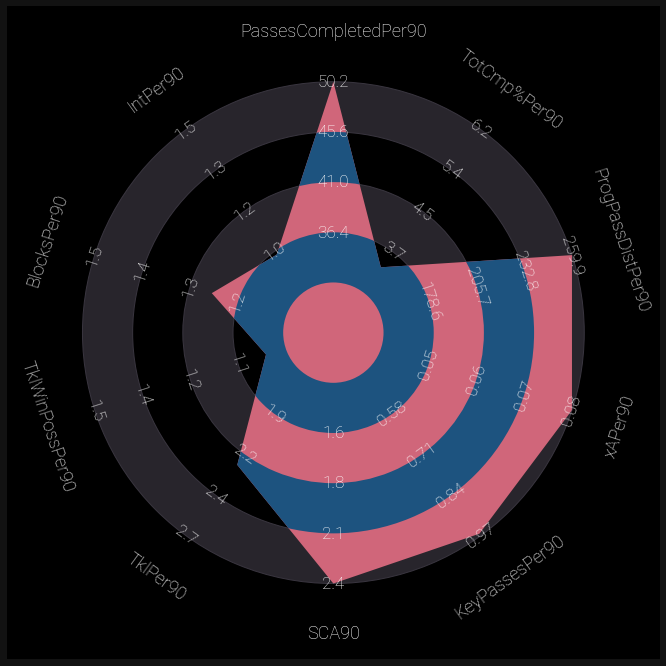

In [389]:
fig,ax = radar.setup_axis()

rings_inner = radar.draw_circles(ax=ax, facecolor='#28252c', edgecolor='#39353f') # drawing the circles
radar_output = radar.draw_radar(busquets_values, ax=ax, 
                                kwargs_radar={'facecolor': '#d0667a'},
                                kwargs_rings={'facecolor': '#1d537f'})
#radar_poly, ring_outer_vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=17, color='white', fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=ax, fontsize=18, color='#fcfcfc',
                                       fontproperties=robotto_thin.prop)  # draw the param labels

#lines = radar.spoke(ax=ax, color='#a6a4a1', linestyle='--', zorder=2)

ax.set_facecolor('black')
fig.set_facecolor('#121212')

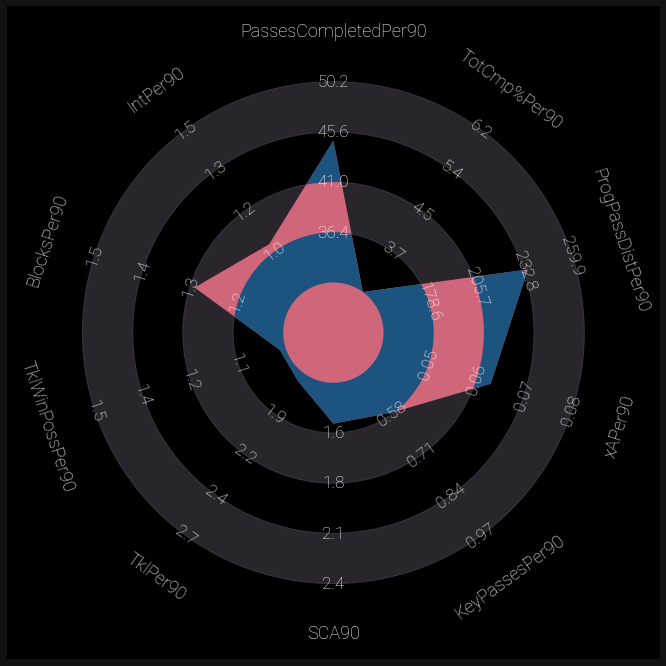

In [390]:
fig,ax = radar.setup_axis()

rings_inner = radar.draw_circles(ax=ax, facecolor='#28252c', edgecolor='#39353f') # drawing the circles
radar_output = radar.draw_radar(zubimendi_values, ax=ax, 
                                kwargs_radar={'facecolor': '#d0667a'},
                                kwargs_rings={'facecolor': '#1d537f'})
#radar_poly, ring_outer_vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=17, color='white', fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=ax, fontsize=18, color='#fcfcfc',
                                       fontproperties=robotto_thin.prop)  # draw the param labels

#lines = radar.spoke(ax=ax, color='#a6a4a1', linestyle='--', zorder=2)

ax.set_facecolor('black')
fig.set_facecolor('#121212')

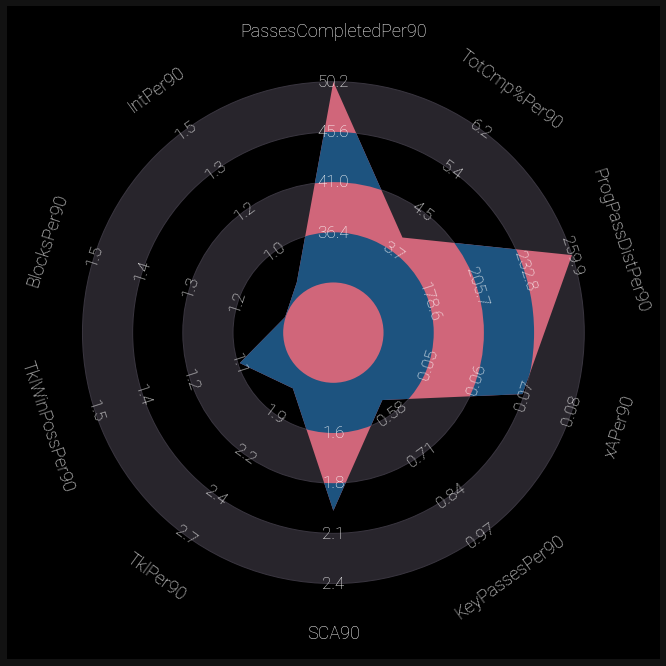

In [391]:
fig,ax = radar.setup_axis()

rings_inner = radar.draw_circles(ax=ax, facecolor='#28252c', edgecolor='#39353f') # drawing the circles
radar_output = radar.draw_radar(amrabat_values, ax=ax, 
                                kwargs_radar={'facecolor': '#d0667a'},
                                kwargs_rings={'facecolor': '#1d537f'})
#radar_poly, ring_outer_vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=17, color='white', fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=ax, fontsize=18, color='#fcfcfc',
                                       fontproperties=robotto_thin.prop)  # draw the param labels

#lines = radar.spoke(ax=ax, color='#a6a4a1', linestyle='--', zorder=2)

ax.set_facecolor('black')
fig.set_facecolor('#121212')

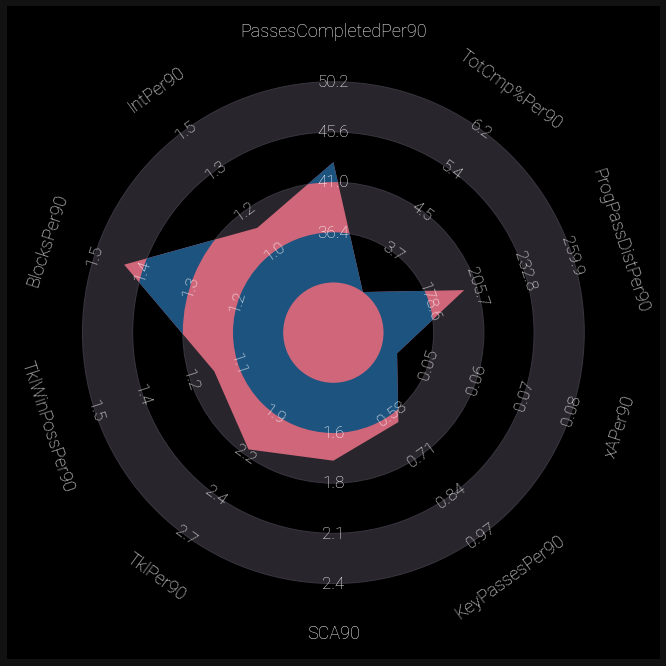

In [392]:
fig,ax = radar.setup_axis()

rings_inner = radar.draw_circles(ax=ax, facecolor='#28252c', edgecolor='#39353f') # drawing the circles
radar_output = radar.draw_radar(romeu_values, ax=ax, 
                                kwargs_radar={'facecolor': '#d0667a'},
                                kwargs_rings={'facecolor': '#1d537f'})
#radar_poly, ring_outer_vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=17, color='white', fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=ax, fontsize=18, color='#fcfcfc',
                                       fontproperties=robotto_thin.prop)  # draw the param labels

#lines = radar.spoke(ax=ax, color='#a6a4a1', linestyle='--', zorder=2)

ax.set_facecolor('black')
fig.set_facecolor('#121212')

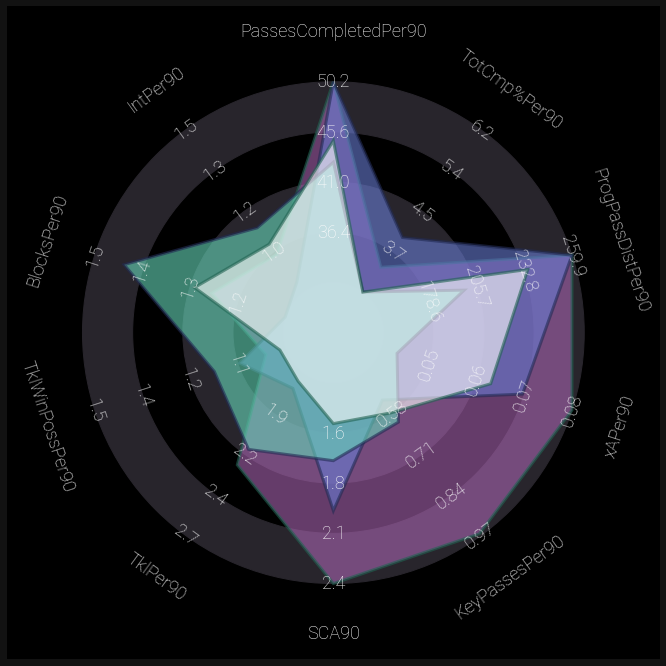

In [400]:
# plot radar
fig, ax = radar.setup_axis()
rings_inner = radar.draw_circles(ax=ax, facecolor='#28252c', edgecolor='#28252c')

radar1, vertices1 = radar.draw_radar_solid(busquets_values, ax=ax,
                                           kwargs={'facecolor': '#aa65b2',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#216352',
                                                   'lw': 3})



radar3, vertices3 = radar.draw_radar_solid(amrabat_values, ax=ax,
                                           kwargs={'facecolor': '#697cd4',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#222b54',
                                                   'lw': 3})

radar4, vertices4 = radar.draw_radar_solid(romeu_values, ax=ax,
                                           kwargs={'facecolor': '#66d8ba',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#222b54',
                                                   'lw': 3})

radar2, vertices2 = radar.draw_radar_solid(zubimendi_values, ax=ax,
                                           kwargs={'facecolor': 'white',#C4B454
                                                   'alpha': 0.6,
                                                   'edgecolor': '#216352',
                                                   'lw': 3})
                                                   
range_labels = radar.draw_range_labels(ax=ax, fontsize=18, color='#fcfcfc', fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=ax, fontsize=18, color='#fcfcfc', fontproperties=robotto_thin.prop)

ax.set_facecolor('black')
fig.set_facecolor('#121212')

In [265]:
print(df_filt['ProgPassDistPer90'].min(), df_filt['ProgPassDistPer90'].max())

198.671186440678 346.9559640872168


## Naughtiest Players
#### Inspiration -> https://www.sonofacorner.com/the-premier-leagues-naughty-boys/

Here let's just add a variable to df_filt, df['total_cards_received'] = df['Yellows'] + df['Reds'] + df['Yellow2']

Create a scatterplot Fouls x Cards Received

Variables to add to df_filt: 
- Fouls 
- Card Received

In [60]:
df_filt

,Player,Squad,PassesCompletedPer90,TotCmp%Per90,ProgPassDistPer90,xAPer90,KeyPassesPer90,SCA90,TklPer90,TklWinPossPer90,BlocksPer90,IntPer90,AerialWin%Per90,CarryMistakesPer90,DisposesedPer90,ReceivedPassPer90
0,Martín Zubimendi,Real Sociedad,44.840374,2.475653,234.853273,0.063850,0.580458,1.51,1.712351,0.957756,1.277007,1.073847,63.0,0.667527,0.493389,41.880039
1,Oriol Romeu,Girona,42.864407,2.635932,198.671186,0.039661,0.610169,1.71,2.135593,1.159322,1.464407,1.128814,45.9,0.793220,0.854237,40.210169
2,Sergio Busquets,Barcelona,66.259085,3.401454,346.955964,0.142369,0.961950,2.85,2.231723,1.000428,1.231295,1.038906,47.3,0.731082,0.461736,59.679350
3,Sofyan Amrabat,Fiorentina,59.594595,4.000000,321.936937,0.072072,0.540541,1.98,1.756757,1.081081,1.036036,0.945946,45.8,0.900901,0.720721,53.873874


In [62]:
df_overall.head(3)

,Player,Squad,PassesCompletedPer90,TotCmp%Per90,ProgPassDistPer90,xAPer90,KeyPassesPer90,SCA90,TklPer90,TklWinPossPer90,BlocksPer90,IntPer90,AerialWin%Per90,CarryMistakesPer90,DisposesedPer90,ReceivedPassPer90
0,Adrien Tameze,Hellas Verona,24.793797,2.271528,130.353019,0.035632,0.653250,1.57,1.514352,0.890795,1.514352,1.098647,46.6,1.158034,1.009568,21.943253
1,Albin Ekdal,Spezia,31.453287,4.022491,163.494810,0.046713,0.519031,1.82,1.920415,1.038062,1.245675,1.349481,63.2,1.660900,0.882353,29.377163
2,Alex Král,Schalke 04,22.375902,2.642342,130.627917,0.068731,0.420025,2.02,1.298261,0.916419,1.183708,0.649130,49.0,1.145524,0.801867,22.910479
